In [1]:
# 加载图像
import cv2
import numpy as np
from matplotlib import  pyplot as plt

# 将图像以灰色导入
image = cv2.imread("images/plane.jpg", cv2.IMREAD_GRAYSCALE)

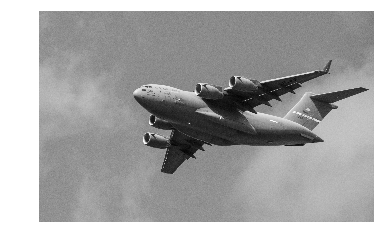

In [3]:
# 展示图像
plt.imshow(image, cmap='gray'), plt.axis('off')
plt.show()

In [4]:
type(image)

numpy.ndarray

In [5]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ..., 
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [7]:
image.shape

(2270, 3600)

In [2]:
# 以彩色导入
image_bar = cv2.imread("images/plane.jpg", cv2.IMREAD_COLOR)

# 显示像素值
image_bar[0,0]

array([195, 144, 111], dtype=uint8)

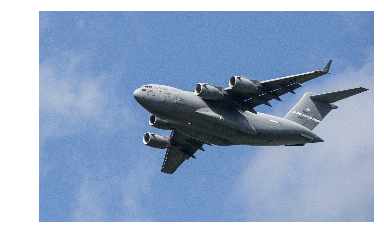

In [3]:
# 转为 RGB 格式
image_rgb = cv2.cvtColor(image_bar, cv2.COLOR_BGR2RGB)

# 显示图像
plt.imshow(image_rgb), plt.axis('off')
plt.show()

In [4]:
# 保存图像

# 导入灰度图像
image = cv2.imread('images/plane.jpg', cv2.IMREAD_GRAYSCALE)
# 保存图像
cv2.imwrite('images/plane_new.jpg', image)

True

True

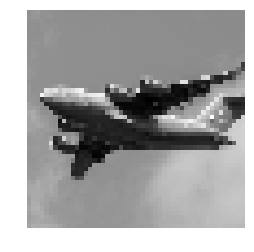

In [5]:
# 调整图片大小

image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 调整图片尺寸
image_50x50 = cv2.resize(image, (50,50))

# 查看图像
plt.imshow(image_50x50, cmap="gray"), plt.axis('off')
plt.show()

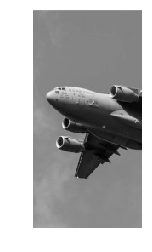

In [6]:
# 剪裁图像
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)
# 选择所有行的前128列
image_cropped = image[:,:128]

plt.imshow(image_cropped, cmap='gray'),plt.axis('off')
plt.show()

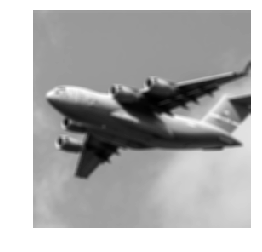

In [7]:
# 平滑处理图像
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 平滑处理图像
image_blurry = cv2.blur(image, (5,5))
plt.imshow(image_blurry, cmap='gray'),plt.axis('off')
plt.show()

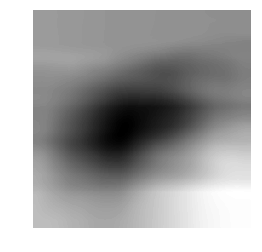

In [8]:
# 平滑100x100

image_blurry = cv2.blur(image, (100,100))
plt.imshow(image_blurry, cmap='gray'),plt.axis('off')
plt.show()

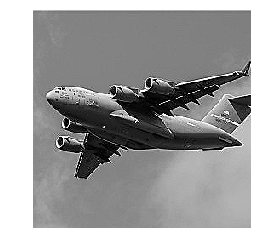

In [9]:
# 图像锐化
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 创建核
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

#锐化图像
image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap='gray'),plt.axis('off')
plt.show()

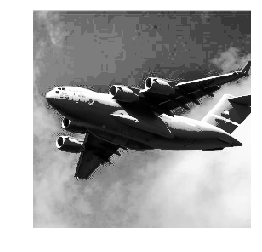

In [10]:
# 提升对比度
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

image_enhanced = cv2.equalizeHist(image)

plt.imshow(image_enhanced, cmap='gray'), plt.axis('off')
plt.show()

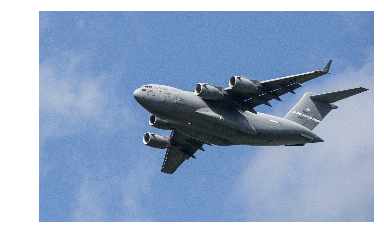

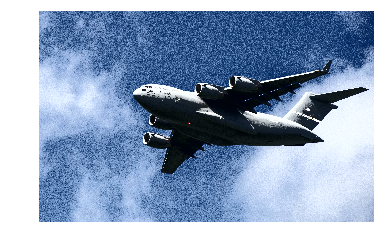

In [4]:
# 对于彩色图像的对比度操作
image_bgr = cv2.imread('images/plane.jpg')

# 转为 RGB 格式
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis('off')
plt.show()

# 转成YUV格式
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# 对图像应用直方图均衡
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# 转成RGB格式
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(image_rgb), plt.axis('off')
plt.show()

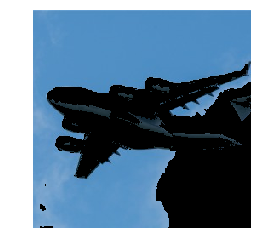

In [5]:
# 颜色分离
image_bgr = cv2.imread('images/plane_256x256.jpg')

# 将BGR转为HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# 定义HSV里面的蓝色的分量
lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255, 255])

# 创建掩模
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# 应用掩模
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask= mask)

image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb), plt.axis('off')
plt.show()


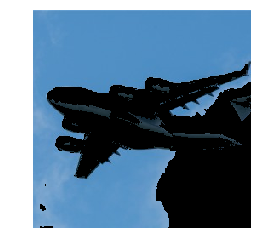

In [6]:
plt.imshow(image_rgb, cmap='gray'), plt.axis('off')
plt.show()

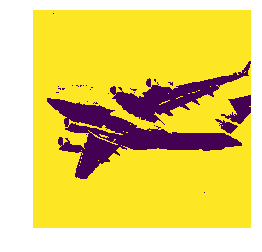

In [7]:
# 图像二值化
image_grey = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 应用自适应阈值处理
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
'''参数
    max_output_value 输出像素最大强度
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C 设置相邻像素的最大强度的加权和
    neighborhood_size 块的大小
    
'''
image_binarized = cv2.adaptiveThreshold(image_grey,
                                       max_output_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)



plt.imshow(image_binarized), plt.axis('off')
plt.show()

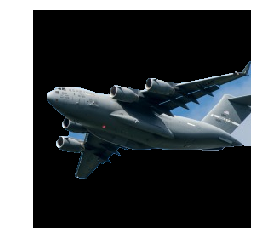

In [2]:
# 移除背景
image_bgr = cv2.imread('images/plane_256x256.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 矩阵  左上角的X坐标 左下角的Y坐标  宽  高
rectangle = (0, 56, 256, 150)

# 创建掩模
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# 创建grabCut 函数临时数组
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image_rgb,
           mask,
           rectangle,
           bgdModel,
           fgdModel,
           5, # 迭代次数
           cv2.GC_INIT_WITH_RECT)  # 定义矩阵初始化

mask_2 = np.where((mask==2) | (mask==0), 0,1).astype('uint8')

image_rgb_nobg = image_rgb*mask_2[:,:,np.newaxis]

plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

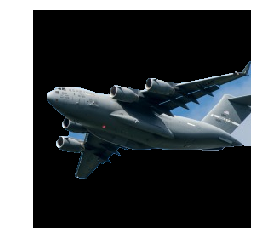

In [3]:
plt.imshow(image_rgb_nobg, cmap='gray'), plt.axis("off")
plt.show()

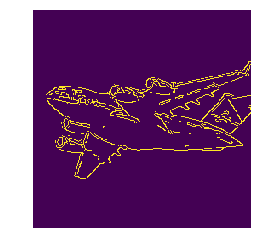

In [4]:
# 边缘检测
image_gray = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

median_intensity = np.median(image_gray)

# 设置阈值
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(max(0, (1.0 + 0.33) * median_intensity))

# 应用CANNY 边缘检测器
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny), plt.axis('off')
plt.show()